In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import multinomial, beta, dirichlet
from scipy.integrate import cumtrapz
import statsmodels.stats.proportion

# progress bar
from tqdm import tqdm

import pandas as pd

plot_all_lines = False
import warnings
warnings.simplefilter('error', RuntimeWarning)


import accuracy_analysis as aa

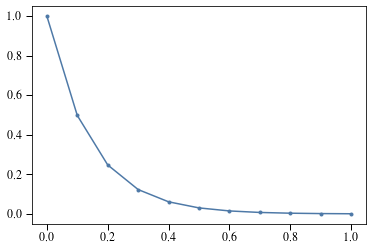

In [2]:
r_M, r_I, N_M = 0.8191511844812219, 0.5923916635105072, 0
N = 10
Ns = np.arange(0, N+1)
f_s = Ns/N
plt.figure()
Ltest = aa.L(Ns, r_M, r_I, N_M, N)
plt.plot(f_s, Ltest, '.-')
Ns = np.arange(N+1)

# A consistency check

Pretend first that there are separate processes, where someone shows you a group of mergers, and another where someone shows you a group of isolated galaxies. Given $N_M$ mergers and an accuracy of measuring $r_M$, the probability that you would say there are $\hat N_{M,1}$  galaxies in this sample is
$$
P(\hat N_{M,1}\mid r_M,N_M)=\binom{N_M}{\hat N_{M,1}}r_M^{\hat N_{M,1}}(1-r_M)^{N_M-\hat N_{M,1}}.
$$
Similarly, if someone showed you $N_I$ mergers and you accurately identified them accurately with a probability $r_I$, you would get $\hat N_{I,1}$ mergers correctly with probability
$$
P(\hat N_{I,1}\mid r_I,N_I)=\binom{N_I}{\hat N_{I,1}}r_I^{\hat N_{I,1}}(1-r_I)^{N_I-\hat N_{I,1}}
$$
However, we're interested in the number of isolated galaxies classified as mergers, $\hat N_{M,2}=N_I-\hat N_{I,1}$. We can write this as
$$
P(\hat N_{M,2}\mid r_I, N_I)=\binom{N_I}{N_I-\hat N_{M,2}}r_I^{N_I-\hat N_{M,2}}(1-r_I)^{\hat N_{M,2}}
$$

Text(0.5, 0, '$\\hat N_{M,2}$')

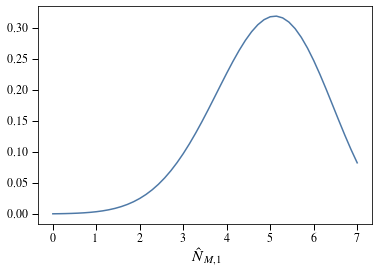

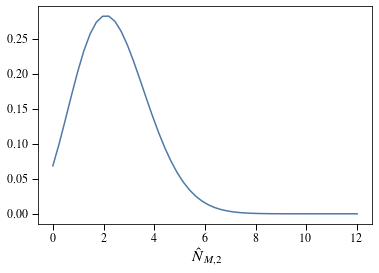

In [3]:
from scipy.special import binom
N_M = 7
N_I = 12
N_Mhats1 = np.linspace(0,N_M)
N_Mhats2 = np.linspace(0,N_I)
r_M = 0.7
r_I = 0.8
plt.figure()
plt.plot(N_Mhats1, binom(N_M, N_Mhats1)*r_M**N_Mhats1*(1-r_M)**(N_M-N_Mhats1))
plt.xlabel(r'$\hat N_{M,1}$')

plt.figure()
plt.plot(N_Mhats2, binom(N_I, N_I-N_Mhats2)*r_I**(N_I-N_Mhats2)*(1-r_I)**N_Mhats2)
plt.xlabel(r'$\hat N_{M,2}$')


Now of course, we are interested in the probability that we measure a total of $\hat N_M$ mergers given both of these processes, given a fixed number $N_M$ and $N_I$ of galaxies.

$\hat N_M=\hat N_{M,1}+\hat N_{M,2}$, and these processes happen simultaneously; therefore we want to do the "triangular" sum;

$$
P(\hat N_M\mid r_M,r_I,N_M,N_I)=
\sum_{\hat N_{M,1}+\hat N_{M,2}=\hat N_{M}}
P(\hat N_{M,1}\mid r_M,N_M)P(\hat N_{M,2}\mid r_I,N_I)
$$


Since $\hat N_{M,1}$ is the variable we are more interested in, we will make $\hat N_{M,2}$ a function of it. Also, there are strict limits on $\hat N_{M,1}$, e.g., it cannot be less than 0, or greater than $N_M$. The probability distribution then becomes
$$
P(\hat N_M\mid r_M,r_I,N_M,N_I)=
\sum_{\hat N_{M,1}=0}^{N_M}
P(\hat N_{M,1}\mid r_M,N_M)P(\hat N_M-\hat N_{M,1}\mid r_I,N_I)
$$

This curve seems reasonable. Its peak is at the sum of the peak locations for $\hat N_{M,1}$ and $\hat N_{M,2}$.

Now of course, in real life, we would rather have the probability distribution for $N_M$, and we are less interested in $N_I$, but we know that we have $N_\mathrm{tot}$ galaxies, so our probability distribution looks more like (substituting every $N_I\to N_\mathrm{tot}-N_M$)
$$
P(\hat N_M\mid r_M,r_I,N_M,N_\mathrm{tot})=
\sum_{\hat N_{M,1}=0}^{N_M}
P(\hat N_{M,1}\mid r_M,N_M)P(\hat N_M-\hat N_{M,1}\mid r_I,N_\mathrm{tot}-N_M)
$$

To get the posterior distribution, we assume a flat prior on $N_M$, and write
$$
P(N_M\mid\hat N_M,r_M,r_I,N_\mathrm{tot})
\propto P(\hat N_M\mid r_M,r_I,N_M,N_\mathrm{tot})P(N_M)
$$

To evaluate this function, we simply need to take the function above and keep $\hat N_M$ fixed while $N_M$ varies. In practice, we need to be a bit more careful.

$N_M$ can be anywhere from 0 to $N_\mathrm{tot}$. $\hat N_M$ is fixed, but $\hat N_{M,1}$ can vary. The limits of the sum remain the same.

So for each $N_M$, we get one number.

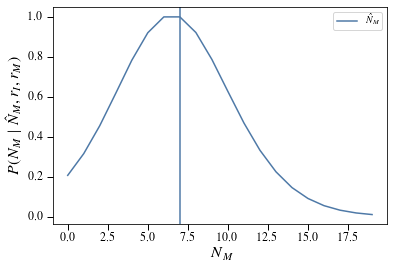

In [4]:
N_tot = 19
N_Ms = np.arange(0, N_tot+1)
P_arr = np.zeros(len(N_Ms))
N_Mhat = 7
P_arr = aa.L(N_Ms, r_I, r_M, N_Mhat, N_tot)
plt.plot(N_Ms, P_arr)
plt.xlabel(r'$N_M$')
plt.ylabel(r'$P(N_M\mid \hat N_M,r_I,r_M)$')
plt.axvline(N_Mhat, label=r'$\hat N_M$')
plt.legend(loc='best')

10 [8 7 5 9 6 6 8 6 7 5 6 5 9 7] [0.70441395 0.7139765  0.71340034 0.722362   0.67577319 0.67893457
 0.71187563 0.72153631 0.69743766 0.70470337 0.71241449 0.71035298
 0.71045681 0.68130028] [0.77612573 0.79360499 0.78997694 0.81479058 0.81828872 0.78439452
 0.77662436 0.82341855 0.81045046 0.79231161 0.79322309 0.8217303
 0.80337131 0.80214716]


Text(0.5, 0, '$N_M$')

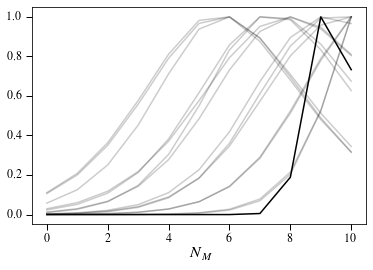

In [5]:
N_tot = 10
n = 14
f_M = 1
N_true, N_M, r_Ms, r_Is = aa.make_sample(N_tot, f_M, n, N_M=10, r_M=0.7, r_I=0.8)
print(N_true, N_M, r_Ms, r_Is)

logP_tot = np.zeros(N_tot+1)
N_Ms = np.arange(N_tot+1)
for i in range(n):
    P_arr = aa.L(N_Ms, r_Is[i], r_Ms[i], N_M[i], N_tot)
    logP_tot += np.log(P_arr)
    plt.plot(N_Ms, P_arr, color='k', alpha=0.2)
plt.plot(N_Ms, np.exp(logP_tot-logP_tot.max()), color='k')
plt.xlabel(r'$N_M$')

100%|██████████| 500/500 [00:08<00:00, 56.56it/s]


Text(0.5, 1.0, 'N=10')

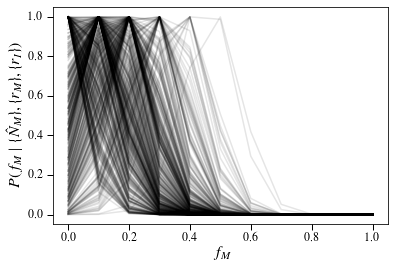

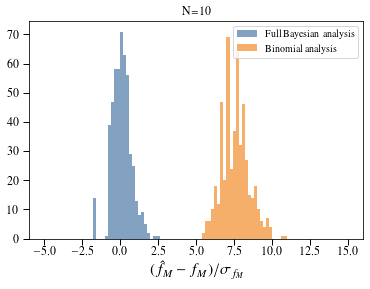

In [6]:
# Total sample size
N = 10
# True merger fraction
f_M = 0.1
# number of classifier
n = 14

n_exp = 500
mu1 = np.zeros(n_exp)
mu2 = np.zeros(n_exp)
ll1 = np.zeros(n_exp)
ul1 = np.zeros(n_exp)
ll2 = np.zeros(n_exp)
ul2 = np.zeros(n_exp)

N_trues = np.zeros(n_exp)
Z1 = np.zeros(n_exp)
Z2 = np.zeros(n_exp)

Ns = np.arange(0, N+1.)
fs = Ns/N
for _ in tqdm(range(n_exp)):
#for _ in range(n_exp):
    N_true, N_M, r_Ms, r_Is = aa.make_sample(N, f_M, n, N_M=int(f_M*N))
    lnLi = aa.L(Ns, r_Ms[0], r_Is[0], N_M[0], N)*0
    for i in range(n):
        lnLi += np.log(aa.L(Ns, r_Is[i], r_Ms[i], N_M[i], N))
    Pi = np.exp(lnLi - lnLi.max())
    plt.figure(1)
    plt.plot(Ns/N, Pi, 'k', alpha=0.1)
    plt.xlabel(r'$f_M$')
    plt.ylabel(r'$P(f_M\mid\{\hat N_M\},\{r_M\},\{r_I\})$')
    mu = sum(fs*Pi)/sum(Pi)
    ll, ul, sd = aa.pdf_std(Pi, fs)
    Z1[_] = (mu-N_true/N)/sd
    mu1[_] = mu
    ll1[_] = ll
    ul1[_] = ul
    
    mu = (n*N_M.mean()+1)/(n*N+2)
    mu2[_] = mu
    ll, ul, sd = aa.beta_std(sum(N_M), n*N)
    #ll, ul, sd = aa.beta_std(N_M.mean(), N)
    Z2[_] = (mu-N_true/N)/sd
    ll2[_] = ll
    ul2[_] = ul
    
    N_trues[_] = N_true
bins = np.linspace(-5,15,101)
plt.figure()
plt.hist(Z1, bins=bins, alpha=0.7, label='Full Bayesian analysis')
plt.hist(Z2, bins=bins, alpha=0.7, label='Binomial analysis')
plt.legend(loc='best')
plt.xlabel(r'$(\hat f_M-f_M)/\sigma_{f_M}$')
plt.title(f'N={N}')

100%|██████████| 500/500 [01:42<00:00,  4.90it/s]


Text(0.5, 1.0, 'N=50')

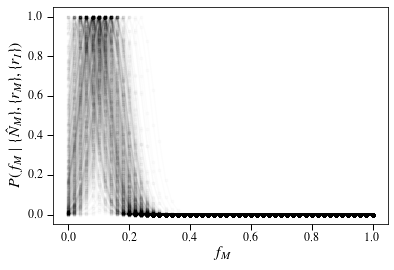

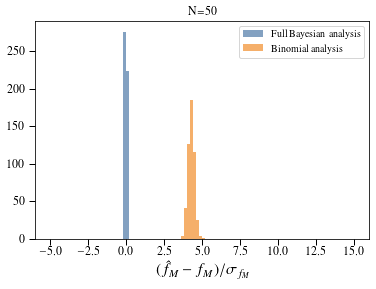

In [7]:
# Total sample size
N = 50
# True merger fraction
f_M = 0.1
# number of classifier
n = 14

n_exp = 500
mu1 = np.zeros(n_exp)
mu2 = np.zeros(n_exp)
ll1 = np.zeros(n_exp)
ul1 = np.zeros(n_exp)
ll2 = np.zeros(n_exp)
ul2 = np.zeros(n_exp)

N_trues = np.zeros(n_exp)
Z1 = np.zeros(n_exp)
Z2 = np.zeros(n_exp)

Ns = np.arange(0, N+1.)
fs = Ns/N
for _ in tqdm(range(n_exp)):
    # The true sample has zero mergers in it.
    N_true, N_M, r_Ms, r_Is = aa.make_sample(N, f_M, n, N_M=int(f_M*N))
    lnLi = aa.L(Ns, r_Ms[0], r_Is[0], N_M[0], N)*0
    try:
        for i in range(n):
            lnLi += np.log(aa.L(Ns, r_Is[i], r_Ms[i], N_M[i], N))
    except RuntimeWarning:
        print('Runtimewarning')
        break
    Pi = np.exp(lnLi - lnLi.max())
    plt.figure(1)
    plt.plot(fs, Pi, 'k.-', alpha=0.01)
    plt.xlabel(r'$f_M$')
    plt.ylabel(r'$P(f_M\mid\{\hat N_M\},\{r_M\},\{r_I\})$')
    mu = sum(fs*Pi)/sum(Pi)
    ll, ul, sd = aa.pdf_std(Pi, Ns)
    Z1[_] = (mu-N_true/N)/sd
    mu1[_] = mu
    ll1[_] = ll
    ul1[_] = ul
    
    mu = (n*N_M.mean()+1)/(n*N+2)
    mu2[_] = mu
    #ll, ul, sd = beta_std(sum(N_M), n*N)
    ll, ul, sd = aa.beta_std(N_M.mean(), N)
    Z2[_] = (mu-N_true/N)/sd
    ll2[_] = ll
    ul2[_] = ul
    
    N_trues[_] = N_true
bins = np.linspace(-5,15,101)
plt.figure()
plt.hist(Z1, bins=bins, alpha=0.7, label='Full Bayesian analysis')
plt.hist(Z2, bins=bins, alpha=0.7, label='Binomial analysis')
plt.legend(loc='best')
plt.xlabel(r'$(\hat f_M-f_M)/\sigma_{f_M}$')
plt.title(f'N={N}')



100%|██████████| 500/500 [06:16<00:00,  1.33it/s]


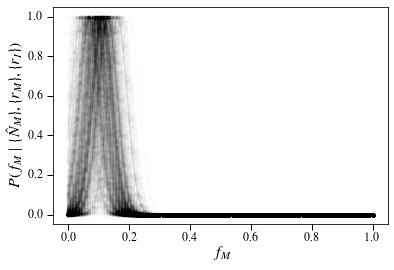

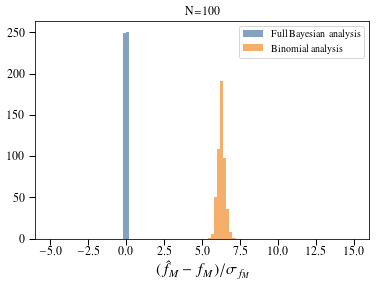

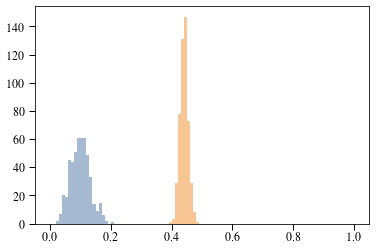

In [8]:
# Total sample size
N = 100
# True merger fraction
f_M = 0.1
# number of classifier
n = 14

n_exp = 500
mu1 = np.zeros(n_exp)
mu2 = np.zeros(n_exp)
ll1 = np.zeros(n_exp)
ul1 = np.zeros(n_exp)
ll2 = np.zeros(n_exp)
ul2 = np.zeros(n_exp)

N_trues = np.zeros(n_exp)
Z1 = np.zeros(n_exp)
Z2 = np.zeros(n_exp)

Ns = np.arange(0, N+1.)
fs = Ns/N
for _ in tqdm(range(n_exp)):
    # The true sample has zero mergers in it.
    N_true, N_M, r_Ms, r_Is = aa.make_sample(N, f_M, n, N_M=int(f_M*N))
    lnLi = aa.L(Ns, r_Is[0], r_Ms[0], N_M[0], N)*0
    try:
        for i in range(n):
            lnLi += np.log(aa.L(Ns, r_Is[i], r_Ms[i], N_M[i], N))
    except RuntimeWarning:
        print('Runtimewarning')
        break
    Pi = np.exp(lnLi - lnLi.max())
    plt.figure(1)
    plt.plot(fs, Pi, 'k.-', alpha=0.01)
    plt.xlabel(r'$f_M$')
    plt.ylabel(r'$P(f_M\mid\{\hat N_M\},\{r_M\},\{r_I\})$')
    mu = sum(fs*Pi)/sum(Pi)
    ll, ul, sd = aa.pdf_std(Pi, Ns)
    Z1[_] = (mu-N_true/N)/sd
    mu1[_] = mu
    ll1[_] = ll
    ul1[_] = ul
    
    mu = (n*N_M.mean()+1)/(n*N+2)
    mu2[_] = mu
    #ll, ul, sd = beta_std(sum(N_M), n*N)
    ll, ul, sd = aa.beta_std(N_M.mean(), N)
    Z2[_] = (mu-N_true/N)/sd
    ll2[_] = ll
    ul2[_] = ul
    
    N_trues[_] = N_true
bins = np.linspace(-5,15,101)
plt.figure()
plt.hist(Z1, bins=bins, alpha=0.7, label='Full Bayesian analysis')
plt.hist(Z2, bins=bins, alpha=0.7, label='Binomial analysis')
plt.legend(loc='best')
plt.xlabel(r'$(\hat f_M-f_M)/\sigma_{f_M}$')
plt.title(f'N={N}')

plt.figure()
_=plt.hist(mu1, bins=Ns/N, alpha=0.5)
_=plt.hist(mu2, bins=Ns/N, alpha=0.5)

In [ ]:
# Make a plot with different merger fractions


f_M_truths = np.arange(0.05, 0.95, 0.1)
fs = np.linspace(0,1,1001)

Z1mu = []
Z2mu = []
Z1sd = []
Z2sd = []
r_M_base = 0.95
r_I_base = 0.95
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)
axs = axes.flatten()
for f_i in range(len(f_M_truths)):
    mu1 = np.zeros(n_exp)
    mu2 = np.zeros(n_exp)
    ll1 = np.zeros(n_exp)
    ul1 = np.zeros(n_exp)
    ll2 = np.zeros(n_exp)
    ul2 = np.zeros(n_exp)

    N_trues = np.zeros(n_exp)
    Z1 = np.zeros(n_exp)
    Z2 = np.zeros(n_exp)

    Ns = N*fs
    for _ in range(n_exp):
        N_true, N_M, r_Ms, r_Is = aa.make_sample(N, f_M_truths[f_i], n, r_M=r_M_base, r_I=r_I_base)
        P = aa.L(Ns, r_Ms[0], r_Is[0], N_M[0], N)*0 + 1
        for i in range(n):
            P *= aa.L(Ns, r_Is[i], r_Ms[i], N_M[i], N)
        #P = np.exp(lnLi - lnLi.max())
        mu = sum(fs*P)/sum(P)
        ll, ul, sd = aa.pdf_std(P, fs)
        Z1[_] = (mu-N_true/N)/sd
        mu1[_] = mu
        ll1[_] = ll
        ul1[_] = ul
    
        mu = (n*N_M.mean()+1)/(n*N+2)
        mu2[_] = mu
        #ll, ul, sd = beta_std(sum(N_M), n*N)
        ll, ul, sd = aa.beta_std(N_M.mean(), N)
        Z2[_] = (mu-N_true/N)/sd
        ll2[_] = ll
        ul2[_] = ul
    
        N_trues[_] = N_true
    if f_i == 0:
        bins = np.linspace(-int(3*Z2.mean()), int(3*Z2.mean()), 101)

    axs[f_i].hist(Z1, bins=bins, alpha=0.5)
    axs[f_i].hist(Z2, bins=bins, alpha=0.5)
    Z1mu.append(Z1.mean())
    Z2mu.append(Z2.mean())
    Z1sd.append(Z2.std())
    Z2sd.append(Z2.std())

# Make plot of merger fraction on horizontal axis, y axis is mean sigma away, error bars are spread of distribution.
plt.figure()
plt.errorbar(f_M_truths, Z1mu, Z1sd, fmt='o')
plt.errorbar(f_M_truths, Z2mu, Z2sd, fmt='o')
plt.xlabel(r'$f_M$')

In [ ]:
# Make a plot with different merger fractions


f_M_truths = np.arange(0.1, 1, 0.1)
fs = np.linspace(0,1,1001)
bins = np.linspace(-10,10, 101)

Z1mu = []
Z2mu = []
Z1sd = []
Z2sd = []
r_M_base = 0.05
r_I_base = 0.05
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)
axs = axes.flatten()
for f_i in range(len(f_M_truths)):
    mu1 = np.zeros(n_exp)
    mu2 = np.zeros(n_exp)
    ll1 = np.zeros(n_exp)
    ul1 = np.zeros(n_exp)
    ll2 = np.zeros(n_exp)
    ul2 = np.zeros(n_exp)

    N_trues = np.zeros(n_exp)
    Z1 = np.zeros(n_exp)
    Z2 = np.zeros(n_exp)

    Ns = N*fs
    for _ in range(n_exp):
        N_true, N_M, r_Ms, r_Is = aa.make_sample(N, f_M_truths[f_i], n, r_M=r_M_base, r_I=r_I_base)
        lnLi = aa.L(Ns, r_Is[0], r_Ms[0], N_M[0], N)*0
        for i in range(n):
            lnLi += np.log(aa.L(Ns, r_Is[i], r_Ms[i], N_M[i], N))
        P = np.exp(lnLi - lnLi.max())
        mu = sum(fs*P)/sum(P)
        ll, ul, sd = aa.pdf_std(P, fs)
        Z1[_] = (mu-N_true/N)/sd
        mu1[_] = mu
        ll1[_] = ll
        ul1[_] = ul
    
        mu = (n*N_M.mean()+1)/(n*N+2)
        mu2[_] = mu
        #ll, ul, sd = beta_std(sum(N_M), n*N)
        ll, ul, sd = aa.beta_std(N_M.mean(), N)
        Z2[_] = (mu-N_true/N)/sd
        ll2[_] = ll
        ul2[_] = ul
    
        N_trues[_] = N_true
    if f_i == 0:
        bins = np.linspace(-30, 30, 101)

    axs[f_i].hist(Z1, bins=bins, alpha=0.5)
    axs[f_i].hist(Z2, bins=bins, alpha=0.5)
    Z1mu.append(Z1.mean())
    Z2mu.append(Z2.mean())
    Z1sd.append(Z2.std())
    Z2sd.append(Z2.std())

# Make plot of merger fraction on horizontal axis, y axis is mean sigma away, error bars are spread of distribution.
plt.figure()
plt.errorbar(f_M_truths, Z1mu, Z1sd, fmt='o')
plt.errorbar(f_M_truths, Z2mu, Z2sd, fmt='o')
plt.xlabel(r'$f_M$')

In [ ]:
# Make a plot with different merger fractions


f_M_truths = np.arange(0.1, 1, 0.1)
fs = np.linspace(0,1,1001)
bins = np.linspace(-10,10, 101)

Z1mu = []
Z2mu = []
Z1sd = []
Z2sd = []
r_M_base = 0.9
r_I_base = 0.5
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)
axs = axes.flatten()
for f_i in range(len(f_M_truths)):
    mu1 = np.zeros(n_exp)
    mu2 = np.zeros(n_exp)
    ll1 = np.zeros(n_exp)
    ul1 = np.zeros(n_exp)
    ll2 = np.zeros(n_exp)
    ul2 = np.zeros(n_exp)

    N_trues = np.zeros(n_exp)
    Z1 = np.zeros(n_exp)
    Z2 = np.zeros(n_exp)

    Ns = N*fs
    for _ in range(n_exp):
        N_true, N_M, r_Ms, r_Is = aa.make_sample(N, f_M_truths[f_i], n, r_I=r_M_base, r_I=r_I_base)
        lnLi = L(Ns, r_Is[0], r_Ms[0], N_M[0], N)*0
        for i in range(n):
            lnLi += np.log(aa.L(Ns, r_Is[i], r_Ms[i], N_M[i], N))
        P = np.exp(lnLi - lnLi.max())
        mu = sum(fs*P)/sum(P)
        ll, ul, sd = aa.pdf_std(P, fs)
        Z1[_] = (mu-N_true/N)/sd
        mu1[_] = mu
        ll1[_] = ll
        ul1[_] = ul
    
        mu = (n*N_M.mean()+1)/(n*N+2)
        mu2[_] = mu
        #ll, ul, sd = beta_std(sum(N_M), n*N)
        ll, ul, sd = aa.beta_std(N_M.mean(), N)
        Z2[_] = (mu-N_true/N)/sd
        ll2[_] = ll
        ul2[_] = ul
    
        N_trues[_] = N_true
    if f_i == 0:
        bins = np.linspace(-12, 12, 101)

    axs[f_i].hist(Z1, bins=bins, alpha=0.5)
    axs[f_i].hist(Z2, bins=bins, alpha=0.5)
    Z1mu.append(Z1.mean())
    Z2mu.append(Z2.mean())
    Z1sd.append(Z2.std())
    Z2sd.append(Z2.std())

# Make plot of merger fraction on horizontal axis, y axis is mean sigma away, error bars are spread of distribution.
plt.figure()
plt.errorbar(f_M_truths, Z1mu, Z1sd, fmt='o')
plt.errorbar(f_M_truths, Z2mu, Z2sd, fmt='o')
plt.xlabel(r'$f_M$')

In [ ]:
# Make a plot with different merger fractions


f_M_truths = np.arange(0.1, 1, 0.1)
fs = np.linspace(0,1,1001)
bins = np.linspace(-10,10, 101)

Z1mu = []
Z2mu = []
Z1sd = []
Z2sd = []
r_M_base = 0.5
r_I_base = 0.9
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)
axs = axes.flatten()
for f_i in range(len(f_M_truths)):
    mu1 = np.zeros(n_exp)
    mu2 = np.zeros(n_exp)
    ll1 = np.zeros(n_exp)
    ul1 = np.zeros(n_exp)
    ll2 = np.zeros(n_exp)
    ul2 = np.zeros(n_exp)

    N_trues = np.zeros(n_exp)
    Z1 = np.zeros(n_exp)
    Z2 = np.zeros(n_exp)

    Ns = N*fs
    for _ in range(n_exp):
        N_true, N_M, r_Ms, r_Is = aa.make_sample(N, f_M_truths[f_i], n, r_M=r_M_base, r_I=r_I_base)
        lnLi = aa.L(Ns, r_Is[0], r_Ms[0], N_M[0], N)*0
        for i in range(n):
            try:
                lnLi += np.log(aa.L(Ns, r_Is[i], r_Ms[i], N_M[i], N))
            except RuntimeWarning:
                print(r_Is[i], r_Ms[i], N_M[i])
        P = np.exp(lnLi - lnLi.max())
        mu = sum(fs*P)/sum(P)
        ll, ul, sd = aa.pdf_std(P, fs)
        Z1[_] = (mu-N_true/N)/sd
        mu1[_] = mu
        ll1[_] = ll
        ul1[_] = ul
    
        mu = (n*N_M.mean()+1)/(n*N+2)
        mu2[_] = mu
        #ll, ul, sd = beta_std(sum(N_M), n*N)
        ll, ul, sd = aa.beta_std(N_M.mean(), N)
        Z2[_] = (mu-N_true/N)/sd
        ll2[_] = ll
        ul2[_] = ul
    
        N_trues[_] = N_true
    if f_i == 0:
        bins = np.linspace(-12, 12, 101)

    axs[f_i].hist(Z1, bins=bins, alpha=0.5)
    axs[f_i].hist(Z2, bins=bins, alpha=0.5)
    Z1mu.append(Z1.mean())
    Z2mu.append(Z2.mean())
    Z1sd.append(Z2.std())
    Z2sd.append(Z2.std())

# Make plot of merger fraction on horizontal axis, y axis is mean sigma away, error bars are spread of distribution.
plt.figure()
plt.errorbar(f_M_truths, Z1mu, Z1sd, fmt='o')
plt.errorbar(f_M_truths, Z2mu, Z2sd, fmt='o')
plt.xlabel(r'$f_M$')

In [ ]:
%reset -f